In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
import os
import numpy as np
import tensorflow as tf
from keras import layers
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import  Dropout, Reshape
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.models import Model

In [96]:
def reshaping(x):
  return np.reshape(x,(32,32))

a = np.load('/content/drive/MyDrive/cvpr dataset/train_data.npz')
x_train, y_train = a['arr_0'], a['arr_1']

xx_train = list((map(reshaping,x_train)))
x_train_ = np.array(xx_train)


b = np.load('/content/drive/MyDrive/cvpr dataset/test_data.npz')
x_test, y_test = b['arr_0'], b['arr_1']

xx_test = list((map(reshaping,x_test)))
x_test_ = np.array(xx_test)

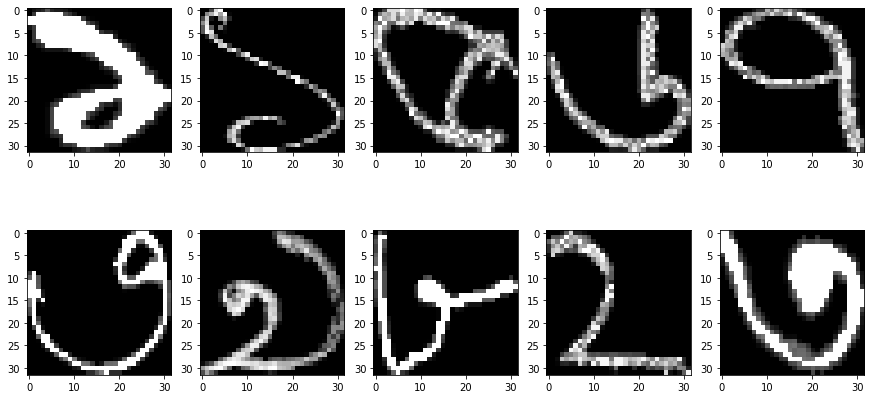

Labels : [[1]
 [1]
 [5]
 [6]
 [7]]
Labels : [[3]
 [9]
 [8]
 [2]
 [3]]


In [97]:
fig1 = plt.figure(figsize = (15,15))

for i in range(5):
    ax1 = fig1.add_subplot(1,5,i+1) 
    ax1.imshow(x_train_[i], interpolation='none', cmap=plt.cm.gray)
    ax2 = fig1.add_subplot(2,5,i+6) 
    ax2.imshow(x_train_[i+6], interpolation='none', cmap=plt.cm.gray)
plt.show()

print("Labels : {}".format(y_train[0:5]))
print("Labels : {}".format(y_train[6:11]))

In [98]:
# Normalizing the input
x_train_ = x_train_.astype('float32')
x_train_/=255

x_test_ = x_test_.astype('float32')
x_test_/=255

print(x_train_.shape)
print(x_test_.shape)

(18000, 32, 32)
(4000, 32, 32)


In [99]:
y_train_ = to_categorical(y_train, num_classes=10, dtype='float32')
y_test_ = to_categorical(y_test, num_classes=10, dtype='float32')

print("Train Set Size = {} images".format(y_train.shape[0]))
print("Test Set Size = {} images".format(y_test.shape[0]))

Train Set Size = 18000 images
Test Set Size = 4000 images


In [100]:
# load model
from keras import models    
model_new = models.load_model('/content/drive/MyDrive/model/vgg16_model_test6.h5')
#set trainable false for pretrained model
for layer in model_new.layers[:-30]:
    layer.trainable = False

for l in model_new.layers:
    print(l.name, l.trainable)

input_2 False
block1_conv1 False
batch_normalization_10 False
activation_10 False
block1_conv2 False
batch_normalization_11 False
activation_11 False
block1_pool False
block2_conv1 False
batch_normalization_12 False
activation_12 False
block2_conv2 False
batch_normalization_13 False
activation_13 False
block2_pool False
block3_conv1 True
batch_normalization_14 True
activation_14 True
block3_conv2 True
batch_normalization_15 True
activation_15 True
block3_conv3 True
batch_normalization_16 True
activation_16 True
block3_pool True
block4_conv1 True
batch_normalization_17 True
activation_17 True
block4_conv2 True
batch_normalization_18 True
activation_18 True
block4_conv3 True
batch_normalization_19 True
activation_19 True
block4_pool True
dropout_4 True
flatten_1 True
dropout_5 True
fc1 True
dropout_6 True
fc2 True
dropout_7 True
fc3 True
dropout_8 True
predictions True


In [101]:
model_new.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 1)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        640       
                                                                 
 batch_normalization_10 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 activation_10 (Activation)  (None, 32, 32, 64)        0         
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_11 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                            

In [102]:
optimizer = 'adam'
objective = 'categorical_crossentropy'

#extract layer weight
last_layer = model_new.get_layer('block3_pool')
last_output = last_layer.output

net = Dropout(rate=.2)(last_output)
net = Flatten()(net)
net = Dropout(rate=.5)(net)
net = Dense(2048, activation='relu', name='fc')(net)
net = Dropout(rate=.2)(net)
net = Dense(1024, activation='relu', name='fc2')(net)
net = Dropout(rate=.2)(net)
net = Dense(512, activation='relu', name='fc3')(net)
net = Dropout(rate=.2)(net)
net = Dense(10, activation='softmax', name='predictions_utl')(net)

# Create model
model_n = Model(inputs = model_new.input, outputs = net, name='vgg16_utl')
model_n.compile(optimizer=optimizer, loss=objective, metrics=['accuracy'])

model_n.summary()

Model: "vgg16_utl"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 1)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        640       
                                                                 
 batch_normalization_10 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 activation_10 (Activation)  (None, 32, 32, 64)        0         
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_11 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                        

In [103]:
for l in model_n.layers:
    print(l.name, l.trainable)

input_2 False
block1_conv1 False
batch_normalization_10 False
activation_10 False
block1_conv2 False
batch_normalization_11 False
activation_11 False
block1_pool False
block2_conv1 False
batch_normalization_12 False
activation_12 False
block2_conv2 False
batch_normalization_13 False
activation_13 False
block2_pool False
block3_conv1 True
batch_normalization_14 True
activation_14 True
block3_conv2 True
batch_normalization_15 True
activation_15 True
block3_conv3 True
batch_normalization_16 True
activation_16 True
block3_pool True
dropout_29 True
flatten_6 True
dropout_30 True
fc True
dropout_31 True
fc2 True
dropout_32 True
fc3 True
dropout_33 True
predictions_utl True


In [104]:
nb_epoch = 100
batch_size = 64

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

ret = model_n.fit(x_train_.reshape((-1,32,32,1)), y_train_, 
                  epochs=nb_epoch, batch_size=batch_size, verbose=1,
                  #validation_split=0.3,
                  validation_data=(x_test_, y_test_),
                  callbacks=[es])

Epoch 1/100
282/282 [==============================] - 12s 39ms/step - loss: 0.2768 - accuracy: 0.9291 - val_loss: 0.0584 - val_accuracy: 0.9825
Epoch 2/100
282/282 [==============================] - 11s 38ms/step - loss: 0.0627 - accuracy: 0.9820 - val_loss: 0.0458 - val_accuracy: 0.9865
Epoch 3/100
282/282 [==============================] - 11s 38ms/step - loss: 0.0438 - accuracy: 0.9879 - val_loss: 0.0489 - val_accuracy: 0.9860
Epoch 4/100
282/282 [==============================] - 11s 37ms/step - loss: 0.0240 - accuracy: 0.9933 - val_loss: 0.0452 - val_accuracy: 0.9870
Epoch 5/100
282/282 [==============================] - 11s 38ms/step - loss: 0.0301 - accuracy: 0.9924 - val_loss: 0.0470 - val_accuracy: 0.9870
Epoch 6/100
282/282 [==============================] - 11s 37ms/step - loss: 0.0421 - accuracy: 0.9899 - val_loss: 0.0425 - val_accuracy: 0.9870
Epoch 7/100
282/282 [==============================] - 11s 37ms/step - loss: 0.0188 - accuracy: 0.9948 - val_loss: 0.0237 - val_ac

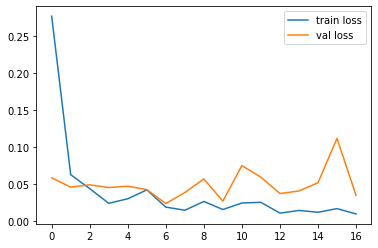

In [105]:
plt.plot(ret.history['loss'], label='train loss')
plt.plot(ret.history['val_loss'], label='val loss')
plt.legend()
plt.show()

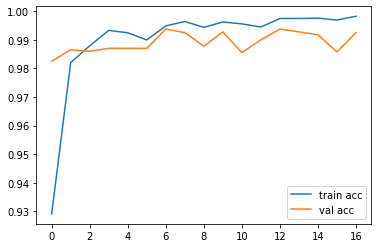

In [106]:
plt.plot(ret.history['accuracy'], label='train acc')
plt.plot(ret.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [107]:
# evaluate the model
_, train_acc = model_n.evaluate(x_train_, y_train_, verbose=0)
_, test_acc = model_n.evaluate(x_test_, y_test_, verbose=0)
print('Train accuracy: %.3f, Test accuracy: %.3f' % (train_acc, test_acc))

Train accuracy: 0.999, Test accuracy: 0.993


In [108]:
predictions = model_n.predict(x_test_.reshape((-1,32,32,1)), verbose=0)

In [109]:
def test_accuracy():
    err = []
    t = 0
    for i in range(predictions.shape[0]):
        if (np.argmax(predictions[i]) == y_test[i]):
            t = t+1
        else:
            err.append(i)
    return t, float(t)*100/predictions.shape[0], err

In [110]:
p = test_accuracy()
print("Test accuracy: {} %".format(p[1]))

Test accuracy: 99.25 %


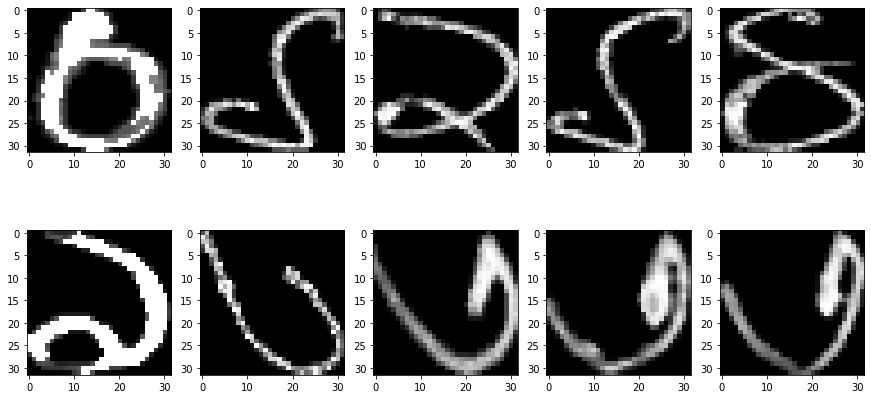

True:          [[0]
 [1]
 [1]
 [1]
 [1]]
classified as: [6 6 2 8 4]
True:          [[1]
 [3]
 [3]
 [3]
 [3]]
classified as: [9 6 6 6 6]


In [111]:
fig1 = plt.figure(figsize = (15,15))

for i in range(5):
    ax1 = fig1.add_subplot(1,5,i+1) 
    ax1.imshow(x_test_[p[2][i]], interpolation='none', cmap=plt.cm.gray)
    ax2 = fig1.add_subplot(2,5,i+6) 
    ax2.imshow(x_test_[p[2][i+6]], interpolation='none', cmap=plt.cm.gray)
plt.show()

print("True:          {}".format(y_test[p[2][0:5]]))
print("classified as: {}".format(np.argmax(predictions[p[2][0:5]], axis=1)))

print("True:          {}".format(y_test[p[2][6:11]]))
print("classified as: {}".format(np.argmax(predictions[p[2][6:11]], axis=1)))